# Data Literacy - Project
## Gender Share in Movies
#### Tobias Stumpp, Sophia Herrmann

### README & TODO

This file analyzes the time-frame 2000-2020, if due to the introducton of the Bechdel test,
if it is possible to find a relationship between the share of actresses on the pricipal cast and the average movie rating.
Additionally, if it is possible that the average movie rating can be predicted by a linear regression model and the predictors:
- share of actress on the principal cast 
- share of actress on the principal cast, genre and movie duration

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import statsmodels.api as sm 

In [2]:
path = '../dat/'
os.chdir(path)

### Read data, keep only the years  2000 - 2020 and include the share of actresses on the principal cast

In [3]:
data_movie = pd.read_csv('data_movie.csv')

# Keep only the years of 2000 to 2020 & sort the data frame according years
dat_2000 = data_movie[(data_movie.startYear >= 2000) & (data_movie.startYear <= 2020)].sort_values("startYear")

In [4]:
# Compute share of actresses on the principal cast and include it into the data set

# 1)
# Number Actress
number_actress = dat_2000[dat_2000.category == "actress"].groupby(["tconst"]).category.count().reset_index() 
number_actress = number_actress.rename(columns = {"category" : "nactress"})
# Number Actors
number_actor = dat_2000[dat_2000.category == "actor"].groupby(["tconst"]).category.count().reset_index()
number_actor = number_actor.rename(columns = {"category" : "nactor"})

# Merge number of actress & actors to data_movie, and delete original category-column & delete row-duplicates
dat_2000 = pd.merge(dat_2000, number_actor, on="tconst", how='left')
dat_2000 = pd.merge(dat_2000, number_actress, on="tconst", how='left')
dat_2000.drop(["category"], axis = 1, inplace = True)
dat_2000 = dat_2000.drop_duplicates()

# 2)
dat_2000["proportion"] = dat_2000["nactress"] / (dat_2000["nactress"] + dat_2000["nactor"])

# Having NaN's, for films w/o actress or w/o actors
# Replace 0 or 1. 1 if no actor is given. 0 if no actress is given
propor_1 = dat_2000.index[(dat_2000.proportion.isnull()) & (dat_2000.nactor.isnull())]
propor_0 = dat_2000.index[(dat_2000.proportion.isnull()) & (dat_2000.nactress.isnull())]

dat_2000.proportion.loc[propor_1] = 1
dat_2000.proportion.loc[propor_0] = 0

/home/tobi/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)



### Descriptive Analysis: Share actress on pricipal cast & average rating

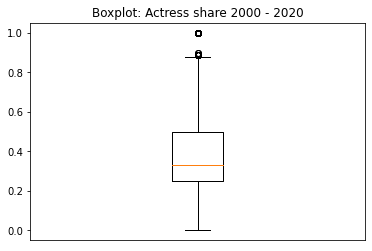

 lower quantile: 0.25
 upper quantile: 0.5
 mean: 0.33


In [5]:
# It is not important for further analysis,
# only to have better understanding of the underlying data set

# Boxplot:
plt.boxplot(dat_2000.proportion)
plt.title("Boxplot: Actress share 2000 - 2020")
plt.xticks([])
plt.show()

# See:
# - Proportions are right skewed, having the mean value by 0.33.
# - Upper quantile 0.75: 0.5; lower quantile 0.25: 0.25
print(f" lower quantile: {np.percentile(dat_2000.proportion, 25)}")
print(f" upper quantile: {np.percentile(dat_2000.proportion, 75)}")
print(f" mean: {np.percentile(dat_2000.proportion, 50).round(2)}")
# Some Outliers between 0.9 - 1.0

# - Porportions -> 50% of the actress shares lies between 0.25 & 0.5.
# Conclude: Actresses are less precence than actors

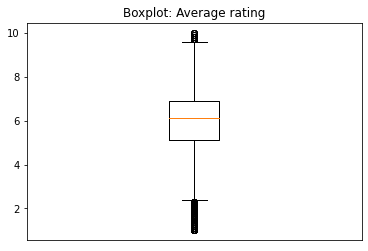

 lower quantile: 5.1
 upper quantile: 6.9
 mean: 6.1


In [6]:
# It is not important for further Analysis,
# only to have better understanding of the underlying data set

# Boxplot:
plt.boxplot(dat_2000.averageRating)
plt.title("Boxplot: Average rating")
plt.xticks([])
plt.show()

# See:
# - Average ratings are normal distributed
print(f" lower quantile: {np.percentile(dat_2000.averageRating, 25)}")
print(f" upper quantile: {np.percentile(dat_2000.averageRating, 75)}")
print(f" mean: {np.percentile(dat_2000.averageRating, 50).round(2)}")
# Some Outliers between rating of ~9.2 - 10 and ~0 - 2.2 

# - Average ratings -> 50% of the average ratings lie between 5.1 & 6.9.

### Analyze possible realtionship between average rating and the share of actresses on pricipal cast. Additionally analyze if average ratings can be predicted by the use of linear regression models

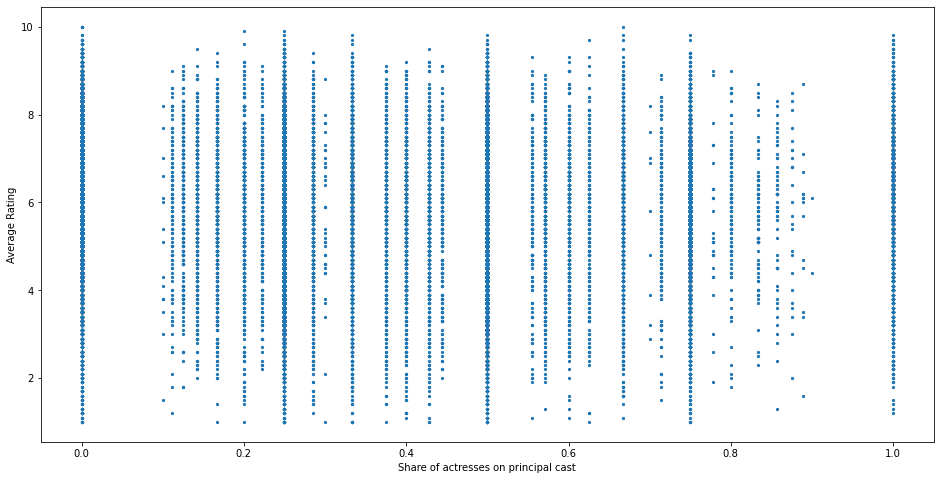

In [7]:
# 1. Anaylze possible pattern/relationship between
# actress share and average rating:
plt.figure(figsize=(16,8))
plt.scatter(dat_2000.proportion, dat_2000.averageRating, s = 5)
plt.xlabel("Share of actresses on principal cast")
plt.ylabel("Average Rating")
plt.show()

Result:
- No clear pattern identifiable
- Many values/outcomes of the actress share covers a wide range of average ratings
----

In [8]:
# We already see, that idea of linearly predicting the average rating on actress share cannot be done by a linear regression model.
# (There is no linear relationship)

# However, we will affirm this conclusion by some statistics:

# 2. Compute pearson correlation coefficient for share of actresses on the principal cast and average movierating:
dat_2000[["proportion", "averageRating"]].corr()

proportion  averageRating
proportion       1.000000      -0.072625
averageRating   -0.072625       1.000000

Result:
- the correlation coefficient has a negative sign, but is too low for presenting a meaningfullness correlation between average rating and actress share.
---------

In [9]:
# Even though there is no correlation, hence no linear relationship,
# a linear regression would not be a suitable model.
# However, just as safty check and regarding our research question we will implement it.

# 2. Linear regression of average rating on the share of actresses on the principal cast
y = dat_2000[["averageRating"]].values
x = dat_2000[["proportion"]].values
x_ = sm.add_constant(x) #adding a constant

reg = sm.OLS(y, x_).fit()
y_pred = reg.predict(x_)
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     518.6
Date:                Mon, 07 Feb 2022   Prob (F-statistic):          1.72e-114
Time:                        10:11:14   Log-Likelihood:            -1.7020e+05
No. Observations:               97801   AIC:                         3.404e+05
Df Residuals:                   97799   BIC:                         3.404e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.0990      0.008    760.018      0.000       6.083       6.115
x1            -0.4049      0.018    -22.772      0.000      -0.440      -0.370
==============================================================================
Omnibus:                     3067.568   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3365.381
Skew:                          -0.445   Prob(JB):                         0.00
Kurtosis:                       3.181   Cond. No.                         4.64
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

 Result:
 - the estimated coefficient for share of actresses on the principal cast is: -0.4049.
 - if the actress share increases by 10%-point (0.10), then on average the average rating decreases by 0.04. 
 - The estimate is singificant and in line with our pearson-correlation coefficient, that also implies a small neg. relationship. 
 
- However, the model has no predictive power. The R-squared value is super low (0.005), hence our model does not explain the variation in the average rating. 
 Therefore, the aim of well predicting the avarage rating on the share of actresses on the principal cast cannot be fullfilled.
 
 ---------------------

### Predicting average rating on share of actresses on the principal cast, movie duration and genre

 Idea: Increase predictive accuracy by including additional explanatory variables as RuntimeMinutes and Genre.
 (f.e. Persons who are watching certain genres differ regarding their preference/awareness for actress share. Hence, genre could have an impact on their rating

#### 1) Checking how many types of genre does the data set includes

In [10]:
genre_counts = dat_2000.genres.value_counts()
genre_counts = genre_counts.reset_index().rename(columns = {'index':'genre', 'genres' : "counts"})
print(f" Number of genres in data set: {len(genre_counts)}")
print("")
print("Top 10 genres regarding their number movies:")
genre_counts.head(10)

 Number of genres in data set: 951

Top 10 genres regarding their number movies:


genre  counts
0                 Drama   19602
1                Comedy    8339
2           Documentary    4657
3          Comedy,Drama    4642
4                Horror    3678
5         Drama,Romance    2960
6              Thriller    2274
7        Comedy,Romance    2271
8  Comedy,Drama,Romance    2195
9        Drama,Thriller    1615

 We can see that the data set consists on 951 genres. Where the majority of those are genre-overlaps such as Comedy-Drama.
 
 Splitting those combinations and allowing the movies to capture several genres
 leads to a dependencies. Further, includung all genres as dummy variables, leads to 950 dummy variables,
 that is messy.

 Therfore, we stick to only those movies who strictly capture only one gerne.
 This reduces the number of dummy variables and could lead to more discrimant power, because the  movies and their type of viewers differ more from each other and hence, differ in their
 preference for actress share.

#### 2) Using only movies that contain a single genreand prepare the data set for a linear regression

In [11]:
# Using the csv file "data_movie_genre", that contains all single genres regarding their movie.id
data_movie_genre = pd.read_csv('data_movie_genre.csv')

# Drop movie.id and keep unique single genres in a list
single_genres = list(data_movie_genre.genre.unique().tolist())

# Keeping only those single genres in the list, that are covered between 2000 and 2020
single_genres = dat_2000[dat_2000["genres"].isin(single_genres)].genres.unique().tolist()

# Keeping only single genres in the data set
dat_2000_gen = dat_2000[dat_2000["genres"].isin(single_genres)]

In [12]:
# Create Dummy variables for those single genres.
# Dropping the last gerne "western", due to multicollineartiy/dummy trap
dat_2000_gen = dat_2000_gen.join(pd.get_dummies(dat_2000_gen["genres"] ))
dat_2000_gen.drop(columns = "Drama", inplace = True)

In [13]:
# Linear Regression Average rating on all genre dummies, runtimeMinutes and actress share

# include runtimeMinutes and proportion into the list of single genres,
# as reference for the predictor variables
single_genres.remove("Drama")
single_genres.append("runtimeMinutes")
single_genres.append("proportion")

y = dat_2000_gen[["averageRating"]].values
x = dat_2000_gen[dat_2000_gen.columns.intersection(single_genres)].values
x = sm.add_constant(x)

single_genres = ["const"] + single_genres

reg = sm.OLS(y, x).fit()
reg.summary(xname = single_genres)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.218
Model:                            OLS   Adj. R-squared:                  0.218
Method:                 Least Squares   F-statistic:                     487.0
Date:                Mon, 07 Feb 2022   Prob (F-statistic):               0.00
Time:                        10:11:15   Log-Likelihood:                -72342.
No. Observations:               43680   AIC:                         1.447e+05
Df Residuals:                   43654   BIC:                         1.450e+05
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              6.1531      0.040    152.550      0.000       6.074       6.232
Comedy             0.0025      0.000      6.342      0.000       0.002       0.003
Horror            -0.1816      0.024     -7.551      0.000      -0.229      -0.134
Action            -0.8941      0.040    -22.516      0.000      -0.972      -0.816
Thriller          -0.6837      0.180     -3.805      0.000      -1.036      -0.332
Documentary       -0.5107      0.087     -5.882      0.000      -0.681      -0.341
Romance           -0.6602      0.066    -10.001      0.000      -0.790      -0.531
Adult              0.2165      0.109      1.990      0.047       0.003       0.430
Family            -0.6678      0.017    -40.124      0.000      -0.700      -0.635
Sci-Fi            -0.4855      0.067     -7.259      0.000      -0.617      -0.354
Fantasy            0.8538      0.022     39.271      0.000       0.811       0.896
Animation         -0.4056      0.052     -7.735      0.000      -0.508      -0.303
Crime             -0.4284      0.087     -4.913      0.000      -0.599      -0.258
Adventure          0.1616      0.127      1.277      0.202      -0.086       0.410
Mystery           -1.7754      0.023    -76.888      0.000      -1.821      -1.730
Musical            0.9499      0.124      7.653      0.000       0.707       1.193
Biography         -0.0975      0.105     -0.929      0.353      -0.303       0.108
War               -0.2995      0.085     -3.522      0.000      -0.466      -0.133
History           -0.3798      1.268     -0.299      0.765      -2.865       2.106
Western           -2.5504      0.732     -3.483      0.000      -3.986      -1.115
Music             -0.4086      0.044     -9.317      0.000      -0.495      -0.323
Sport             -1.2113      0.066    -18.424      0.000      -1.340      -1.082
News              -0.0012      0.178     -0.007      0.995      -0.350       0.347
Reality-TV        -0.9539      0.028    -33.925      0.000      -1.009      -0.899
runtimeMinutes    -0.3767      0.153     -2.462      0.014      -0.677      -0.077
proportion        -1.5547      0.116    -13.431      0.000      -1.782      -1.328
==============================================================================
Omnibus:                     1068.241   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1382.625
Skew:                          -0.305   Prob(JB):                    5.84e-301
Kurtosis:                       3.622   Cond. No.                     1.96e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.96e+04. This might indicate that there are
strong multicollineari

Result:
- the estimated coefficient of the share on actresses on principal cast is: -1.55 and significant.
Hence, if the share in actress by movies of genre drama increases by 10%-points,
the average rating would decrease by 0.155.

- The highest significant effect of actress share on average rating provides the genre Western. An increase of actress share by 10%-points, would lead to an decrease in average rating by (-1.55 + -2.55)/10 = 0.41.

In comparison to the first linear model, now with more explainatory variables
we can see a better model fit. However, the R-squarded  is very low: 0.22.
Hence, our model cannot predict well the variation in avarage rating.

Moreover, we can see that including genres into the model reveals a higher model fit.
This and the significance of some dummy variables incentivices to for further analysis, using only data within single genres.